# Hash Functions and Multiplanes

In this lab, you'll practice key concepts related to hash functions, multiplanes, and random planes. All code and explanations are original and stepwise for sharing as a learning resource.

## 1. Imports
We'll use NumPy for array manipulation, pprint for pretty printing, and Matplotlib for visualization.

In [1]:
import numpy as np
import pprint
import matplotlib.pyplot as plt

In [2]:
pp = pprint.PrettyPrinter(indent=4)

## 2. Basic Hash Tables
Let's implement a simple hash function for integer numbers.

In [3]:
def basic_hash_table(value_l, n_buckets):
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    hash_table = {i: [] for i in range(n_buckets)}
    for value in value_l:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)
    return hash_table

In [4]:
value_l = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


## 3. Planes and Multiplanes
Let's visualize how a single plane divides space and how multiplanes can be used for hashing.

In [5]:
def plot_vectors(vectors, axes=[2,2], colors=['b'], ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    for i, vec in enumerate(vectors):
        color = colors[i % len(colors)]
        ax.arrow(0, 0, vec[0,0], vec[0,1], head_width=0.1, head_length=0.1, fc=color, ec=color, length_includes_head=True)
    ax.set_xlim(-axes[0], axes[0])
    ax.set_ylim(-axes[1], axes[1])
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    return ax

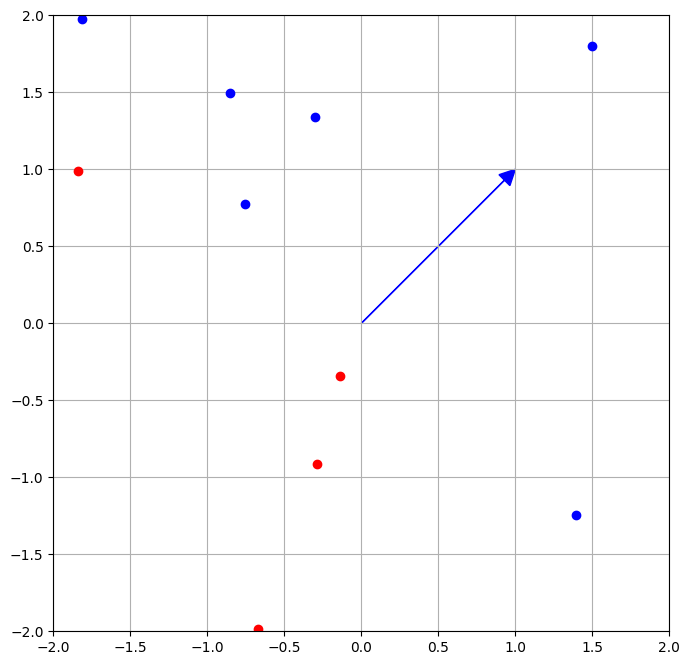

In [6]:
# Single plane
P = np.array([[1, 1]])
fig, ax1 = plt.subplots(figsize=(8, 8))
plot_vectors([P], axes=[2, 2], ax=ax1)
for i in range(10):
    v1 = np.array(np.random.uniform(-2, 2, 2))
    side_of_plane = np.sign(np.dot(P, v1.T))
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo')
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')
plt.show()

### Perpendicular Plane Visualization
Let's plot a plane and its perpendicular.

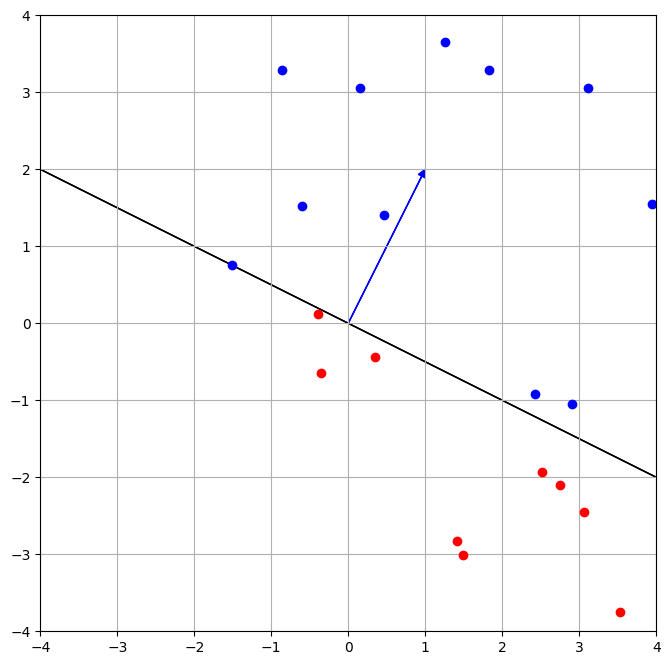

In [7]:
P = np.array([[1, 2]])
PT = np.dot([[0, 1], [-1, 0]], P.T).T
fig, ax1 = plt.subplots(figsize=(8, 8))
plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1)
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)
for i in range(20):
    v1 = np.array(np.random.uniform(-4, 4, 2))
    side_of_plane = np.sign(np.dot(P, v1.T))
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo')
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')
plt.show()

## 4. Side of Plane Function
Let's check on which side of a plane a vector lies.

In [8]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct)
    sign_of_dot_product_scalar = sign_of_dot_product.item()
    return sign_of_dot_product_scalar

P = np.array([[1, 1]])
v1 = np.array([[1, 2]])
v2 = np.array([[-1, 1]])
v3 = np.array([[-2, -1]])
print('v1:', side_of_plane(P, v1))
print('v2:', side_of_plane(P, v2))
print('v3:', side_of_plane(P, v3))

v1: 1
v2: 0
v3: -1


## 5. Hash Function with Multiple Planes
Let's define a hash function using a list of planes.

In [9]:
P1 = np.array([[1, 1]])
P2 = np.array([[-1, 1]])
P3 = np.array([[-1, -1]])
P_l = [P1, P2, P3]
v = np.array([[2, 2]])
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P, v)
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i
    return hash_value
print('Hash value:', hash_multi_plane(P_l, v))

Hash value: 3


## 6. Random Planes
Let's create random planes and use them for hashing.

In [10]:
np.random.seed(0)
num_dimensions = 2
num_planes = 3
random_planes_matrix = np.random.normal(size=(num_planes, num_dimensions))
print('Random planes:')
print(random_planes_matrix)
v = np.array([[2, 2]])
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct)
    return sign_of_dot_product
sides_l = side_of_plane_matrix(random_planes_matrix, v)
print('Sides:', sides_l)
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v)
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item()
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i
    return hash_value
print('Hash value (random planes):', hash_multi_plane_matrix(random_planes_matrix, v, num_planes))

Random planes:
[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]
Sides: [[1.]
 [1.]
 [1.]]
Hash value (random planes): 7


## 7. Document Vectors
Let's see how to represent a document as a vector by summing word vectors.

In [11]:
word_embedding = {"I": np.array([1,0,1]),
                  "love": np.array([-1,0,1]),
                  "learning": np.array([1,0,1])}
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word, 0)
print(document_embedding)

[1 0 3]
